###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause License. (c)2018 Olivier Mesnard. Thanks: Microsoft Azure Sponsorship.

---

# Microsoft Azure Sponsorship: Cost Analysis

---

In [1]:
import os
import pandas
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.style.use('seaborn-dark')

# load style of notebook
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling(os.path.join('styles', 'custom.css'))

In [2]:
# Read csv file with billing details
filepath = os.path.join('data', 'AzureUsage_all.csv')
raw_data = pandas.read_csv(filepath)

In [3]:
raw_data.columns

Index(['SubscriptionName', 'SubscriptionGuid', 'Date', 'ResourceGuid',
       'ServiceName', 'ServiceType', 'ServiceRegion', 'ServiceResource',
       'Quantity', 'Cost'],
      dtype='object')

Our Azure bill reports:

* `SubscriptionName`, the name of the subscription (`Microsoft Azure Sponsorship` in our case);
* `SubscriptionGuid`, the id of the subscription (`{4C217C02-7B06-42DA-B13C-E8DE392FBD00}` in our case);
* `Date`, the date of the charge;
* `ResourceGuid`;
* `ServiceName`;
* `ServiceType`;
* `ServiceRegion`;
* `ServiceResource`;
* `Quantity`;
* `Cost`.

We do not need all columns for our cost analysis; let's keep only the interesting ones: `Date`, `ServiceName`, `ServiceType`, `ServiceRegion`, `ServiceResource`, `Quantity`, and `Cost`.

In [4]:
# Keep interesting columns
columns = ['Date', 'ServiceName', 'ServiceType',
           'ServiceRegion', 'ServiceResource',
           'Quantity', 'Cost']
data = raw_data[columns]

In [5]:
print('Start: {}, end: {}'.format(data['Date'].values[0],
                                  data['Date'].values[-1]))
print('Total cost: {}'.format(data['Cost'].values.sum()))

Start: 4/30/2017, end: 1/3/2018
Total cost: 18436.588668610297


Microsoft Azure Sponsorship granted us \$20,000 to evaluate their cloud platform and run Computational Fluid Dynamics simulations with our in-house MPI-based software [PetIBM](https://github.com/barbagroup/PetIBM).
Between April 30, 2017 and January 3, 2018, we have spent \$18,437 on Microsoft Azure.

___

## Types of charge

___

In [6]:
data['ServiceName'].unique()

array(['Data Management', 'Virtual Machines', 'Networking', 'Storage'], dtype=object)

During that period, we have been charged for the following services:
* `Data Management`,
* `Virtual Machines`,
* `Networking`,
* `Storage`.

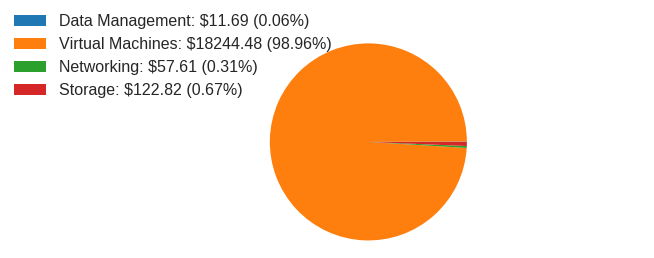

In [7]:
total_cost = data['Cost'].sum()
costs = {}
service_names = data['ServiceName'].unique()
for name in service_names:
    mask = data['ServiceName'] == name
    costs[name] = data[mask]['Cost'].sum()
    
fig, ax = pyplot.subplots(figsize=(10.0, 4.0))
sizes = [costs[name] / total_cost * 100.0
         for name in service_names]
labels = ['{}: ${:.2f} ({:.2f}%)'.format(name, costs[name], size)
          for name, size in zip(service_names, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper left', prop={'size': 16})
ax.axis('equal');

Ok, almost all of the charges are from the usage of virtual machines.

In [8]:
def print_resource_costs(data, service_name='All'):
    """
    Prints the cost of service resources for a given service name.
    
    Parameters
    ----------
    data: pandas.core.frame.DataFrame
        Input data with service name and service resources.
    service_name: string, optional
        Name of the service to display;
        choices: 'Data Management', 'Virtual Machines',
                 'Networking', 'Storage', or 'All';
        default: 'All'.
    """
    if service_name is not 'All':
        mask = data['ServiceName'] == service_name
        data = data[mask]
    service_names = data['ServiceName'].unique()
    for name in service_names:
        print(name)
        mask = data['ServiceName'] == name
        subdata = data[mask]
        service_resources = subdata['ServiceResource'].unique()
        for resource in service_resources:
            mask = subdata['ServiceResource'] == resource
            total_cost = subdata[mask]['Cost'].sum()
            print(' - {}: ${:.6f}'.format(resource, total_cost))
        print()

### Virtual Machines

In [9]:
print_resource_costs(data, service_name='Virtual Machines')

Virtual Machines
 - Compute Hours: $18244.480669



For the use of virtual machines, we have been charged for compute hours.
The compute hour price depends on the instance of virtual machine.
With our sponsorship, we had to possibility to use various instances:

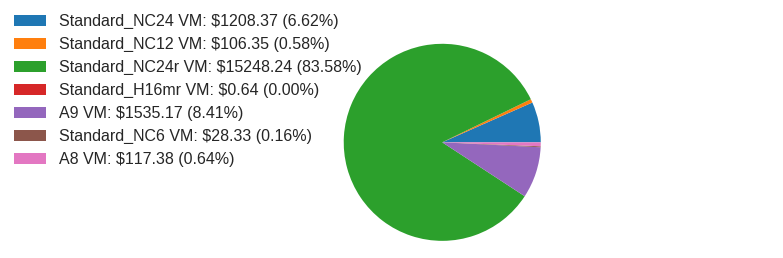

In [10]:
mask = data['ServiceName'] == 'Virtual Machines'
subdata = data[mask]
total_cost = subdata['Cost'].sum()
costs = {}
instances = subdata['ServiceType'].unique()
for instance in instances:
    mask = subdata['ServiceType'] == instance
    costs[instance] = subdata[mask]['Cost'].sum()

fig, ax = pyplot.subplots(figsize=(12.0, 4.0))
sizes = [costs[instance] / total_cost * 100.0
         for instance in instances]
labels = ['{}: ${:.2f} ({:.2f}%)'.format(instance, costs[instance],
                                         size)
          for instance, size in zip(instances, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper left', prop={'size': 16})
ax.axis('equal');

As seen above, we spent most of the money with the instances `Standard_NC24`, `Standard_NC24r`, and `A9`.

The `A9` instances were used to compare runtime obtained on test-cases between Microsoft Azure and our HPC University cluster, Colonial One.

The instance `Standard_NC24` was mostly used to compute the three-dimensional flow around a snake cylinder with a 35-degree angle of attack at Reynolds number 2,000 on a 46-million-cell mesh.

The RDMA-capable instances `Standard_NC24r` were used to run the same simulation on a finer mesh (233 million cells).

### Data Management

In [11]:
print_resource_costs(data, service_name='Data Management')

Data Management
 - Standard IO - Table Read Operation Units (in 10,000s): $0.000016
 - Standard IO - Block Blob Write Operation Units (in 10,000s): $0.003969
 - Standard IO - Block Blob Read Operation Units (in 10,000s): $0.007115
 - Standard IO - Queue Operation Units (in 10,000s): $0.000046
 - Standard IO - File Protocol Operation Units (in 10,000s): $0.521066
 - Standard IO - File Read Operation Units (in 10,000s): $0.546279
 - Standard IO - Block Blob Delete Operation Units (in 10,000s): $0.000011
 - Standard IO - Table Write Operation Units (in 10,000s): $0.003419
 - Standard IO - Page Blob Write Operation Units (in 10,000s): $0.594375
 - Standard IO - Page Blob Read Operation Units (in 10,000s): $0.022818
 - Standard IO - Page Blob Delete Operation Units (in 10,000s): $0.006561
 - Standard IO - Block Blob List Operation Units (in 10,000s): $0.000007
 - Standard IO - File Write Operation Units (in 10,000s): $9.975102
 - Standard IO - File Delete Operation Units (in 10,000s): $0.00

### Networking

In [12]:
print_resource_costs(data, service_name='Networking')

Networking
 - Data Transfer In (GB): $0.000000
 - Data Transfer Out (GB): $55.726161
 - IP Address Hours: $1.880000



Networking charges include data transfer and allocation of public IP addresses.
`Data Transfer In` represents inbound transfer (data going into Azure data centers) and is free.
`Data Transfer Out` is outbound transfer (price depends on the quantity being transferred).
(More details about [data transfer charges](https://azure.microsoft.com/en-us/pricing/details/bandwidth/) and [IP address charges](https://azure.microsoft.com/en-us/pricing/details/ip-addresses/).)

### Storage

In [13]:
print_resource_costs(data, service_name='Storage')

Storage
 - Standard Managed Disk/S4 (Units): $8.084128
 - Standard IO - Block Blob (GB): $0.032647
 - Standard IO - Page Blob/Disk (GB): $57.113960
 - Standard IO - Files (GB): $56.785135
 - Standard IO - Table (GB): $0.002347
 - Standard Managed Disk/S10 (Units): $0.605381
 - Standard Managed Disk/S30 (Units): $0.192676
 - Standard IO - Queue Class 1 Operation Units: $0.000000



___

## 3D simulations of the flying snake

___

We ran simulations of the three-dimensional flow around a cylinder with an anatomically cross-section of the flying snake, _Chrysopelea paradisi_, on Microsoft Azure using two different meshes:

* mesh A: 46 million cells (1071x1072x40),
* mesh B: 233 million cells (1704x1706x80).

We started by computing 100 non-dimensional time-units of flow simulation on mesh A with a 35-degree angle of attack for the snake at Reynolds number 2,000, using a single instance NC24.
Then, we interpolated the final coarse solution on mesh B to compute 75 additional time units, using Azure Batch services on a pool with 6 NC24r nodes.
The computation on the fine mesh B was divided in three runs as there is a 7-day time-limit for Batch tasks.

In [14]:
compute_hour_costs = {'NC24': 3.96,
                      'NC24r': 3.96}

### Re=2,000, AoA=35$^o$ (mesh A)

The simulation was run on a single instance NC24 (featuring 4 NVIDIA K80 GPU devices) in the US South Central region during May, 2017.
We logged into the node, installed PetIBM-0.2 and all its dependencies;
we used PETSc-3.7.4 and the shared library AmgX-1.2.0-build108.
At that time, AmgX was not yet an open-source library but the shared library was accessible to CUDA-registered developpers with a time-limited license.

In [15]:
meshA2k35 = {'ncells': 1071 * 1072 * 40,
             'nodes': 1,
             'instance': 'NC24',
             'data': None,
             'PETSc runtime': 5.33E+05 / 3600.0  # in hours
            }

mask = data['ServiceType'] == 'Standard_NC24 VM'
meshA2k35['data'] = data[mask]

mask = meshA2k35['data']['ServiceRegion'] == 'US South Central'
subdata = meshA2k35['data'][mask]
mask = ((pandas.to_datetime(subdata['Date']) >= '2017-05-01') &
        (pandas.to_datetime(subdata['Date']) <= '2017-05-31'))
subdata[mask]

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
26,5/31/2017,Virtual Machines,Standard_NC24 VM,US South Central,Compute Hours,234.616758,1055.775411


Unfortunately, our billing statement just reports the cost accumulated over May, 2017.
During that month, we also have been running test-cases in addition to this simulation of the flying snake.

However, with PETSc, we have access to the runtime for this simulation.

In [16]:
print('Cost of the run: ${:.2f}'
      .format(meshA2k35['PETSc runtime'] *
              meshA2k35['nodes'] *
              compute_hour_costs[meshA2k35['instance']]))

Cost of the run: $586.30


The runtime reported by PETSc is 148 hours.
With an hourly price of \$3.96 for the NC24 instance, the cost of this run is \$586.30.

### Re=2,000, AoA=35$^o$ (mesh B)

We needed more than one NC24 instance to have enough memory on GPU devices to solve the Poisson system on a 233-million-cell mesh.
We used the instances NC24r that are RDMA-capable.

We used Azure Batch services and [Batch Shipyard](https://github.com/Azure/batch-shipyard) to create the pools and the jobs, and to submit the tasks.

The task was submitted to Azure Batch on a pool of 6 NC24r nodes, each NC24r instance having an hourly cost of \$3.96.

In [17]:
meshB2k35 = {'ncells': 1704 * 1706 * 80,
             'nodes': 6,
             'instance': 'NC24r',
             'data': None,
             'PETSc runtime': None
            }

We do not have the runtime from PETSc for the simulation as we purposely killed the task because of the time-limit enforced on Azure Batch tasks (which was unknown to us at the time of submitting the task).

In [18]:
start, end = '2017-11-14', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35['data'] = data[mask]

mask = meshB2k35['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35['data'][mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshB2k35['nodes']))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(total_hours * compute_hour_costs[meshB2k35['instance']]))
print('- Reported cost: ${:.2f}'
      .format(subdata['Cost'].sum()))

- Total number of compute hours: 1638.00
- Number of compute hours per node: 273.00
- Expected cost for the compute hours: $6486.48
- Reported cost: $6486.48


This simulation was the first time we used Azure Batch services, creating the pool, the job, and the task with Batch Shipyard.
We submitted the task on November 14, 2017, at 3:50 pm and purposely killed on November 28, 2017, at 2:10 pm.

Why did we have to kill the job?

Our simulations run for a prescribed number of time steps and we save the numerical solution (pressure and velocity fields, convective and diffusive terms) at a certain frequency.
We also compute and write into file the aerodynamic forces every time step.
It appears that the numerical solution was output to files for the last time on November, 25, 2017, at 10:25 am, at a time step that is not the final time step.
Something went wrong during the task and the computation was not anymore running normally.
It took me about three days to realize that something was wrong!
Why so long?
I usually check the status of the task to make sure everything is ok.
The pool and job's task were still respectively marked as  "active" and "running", even if the computation was not running.
I even logged into the nodes an ran the "top" command-line utility to check the processes were still running.
However, the compute nodes on the Azure portal were marked as IDLE.

Seeking for help to Microsoft Azure, Fred Park, software engineer and main developer of Batch Shipyard, told us that Batch tasks have a 7-day time-limit enforced (from the time the task is submitted), a restriction that was not yet mentioned in the official documentation of Microsoft Azure.
(As pointed out by Fred Park, there is a not at the end of the documentation for Batch Shipyard; we missed it...)

Three days past between the last time the solution was output to files and the time we had the confirmation that the simulation was not running anymore so we had to kill the job and restart it.

Let's redo our cost analysis for this simulation with the following assumptions:

* the task started at 3:50 pm on November 14, 2017 and run for 8 hours and 10 minutes that day;
* the task ran normally until 10:25 am on November 25, 2017 for 10 hours and 25 minutes that day.

In [19]:
start, end = '2017-11-14', '2017-11-25'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35['data'] = data[mask]

mask = meshB2k35['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35['data'][mask]

hours = subdata['Quantity'].values
# First day: assume run for 8 hours and 10 minutes
hours[0] = (8.0 + 10.0 / 60) * meshB2k35['nodes']
# Last running day: assume run for 10 hours and 25 minutes
hours[-1] = (10.0 + 25.0 / 60) * meshB2k35['nodes']

total_hours = hours.sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshB2k35['nodes']))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(total_hours * compute_hour_costs[meshB2k35['instance']]))
costs = subdata['Cost'].values
costs[0] = hours[0] * compute_hour_costs[meshB2k35['instance']]
costs[-1] = hours[-1] * compute_hour_costs[meshB2k35['instance']]
print('- Effective cost: ${:.2f}'.format(costs.sum()))

- Total number of compute hours: 1251.50
- Number of compute hours per node: 208.58
- Expected cost for the compute hours: $4955.94
- Effective cost: $4955.94


We can also estimate the money lost because we were not aware of this 7-day time-limit restriction for Azure Batch tasks:

In [20]:
start, end = '2017-11-25', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
loss_data = data[mask]

cost_20171125 = costs[-1]  # cost on December 25, 2017 when simulation was running

mask = loss_data['ServiceName'] == 'Virtual Machines'
loss_costs = loss_data['Cost'][mask].values
loss_costs[0] -= cost_20171125  # adjust to keep only money wasted
print('Total cost charged for the virtual machines '
      'while simulation not running: ${:.2f}'
      .format(loss_costs.sum()))

Total cost charged for the virtual machines while simulation not running: $1344.42


As said before, the simulation stopped running correctly on November 29, 2017, at 10:25 am an was killed on November 28, 2017, at 2:10 pm.
Thus, the pool was still allocated for 75 hours and 45 minutes.
With an hourly price of \$3.96 for each of the 6 NC24r nodes, we would be expecting a charge of \$1799.8.
However, it appears that we were only chaged for \$1344.4.

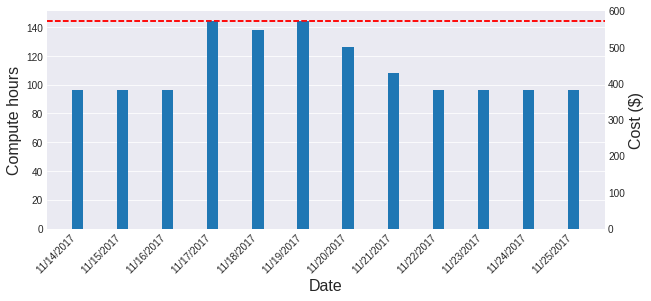

In [21]:
mask = meshB2k35['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35['data'][mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * meshB2k35['nodes'], color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * meshB2k35['nodes'] *
            compute_hour_costs[meshB2k35['instance']],
            color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

It is surprising to see that we have been charged for 24 hours of computation only two days (11/17/2017 and 11/19/2017).

In [22]:
mask = pandas.to_datetime(meshB2k35['data']['Date']) == '2017-11-16'
subdata = meshB2k35['data'][mask]
mask = subdata['ServiceName'] == 'Virtual Machines'
print('Calculated price per compute hours: {}'
      .format(subdata[mask]['Cost'].values /
              subdata[mask]['Quantity'].values))
print('Calculated number of hours charged: {}'
      .format(subdata[mask]['Quantity'].values / meshB2k35['nodes']))
subdata[mask]

Calculated price per compute hours: [ 3.96]
Calculated number of hours charged: [ 16.]


,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1139,11/16/2017,Virtual Machines,Standard_NC24r VM,US East,Compute Hours,96.0,380.16


On November 16, 2017, we were in the middle on the run but we have been charged for 96 hours at a cost of \$380.16, which means that the simulation was running for only 16 hours (instead of 24 hours as expected).

#### Other costs

Between November 14 and November 29, 2017, we have also been charged for `Networking`, `Data Management`, and `Storage`.

In [23]:
start, end = '2017-11-14', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]

service_names = ['Networking', 'Data Management', 'Storage']
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {} cost: ${:.2f}'.format(name,
                                      subdata[mask]['Cost'].sum()))
    service_resources = subdata[mask]['ServiceResource'].unique()
    for resource in service_resources:
        print('\t- ' + resource)

- Networking cost: $20.59
	- Data Transfer In (GB)
	- Data Transfer Out (GB)
- Data Management cost: $2.53
	- Standard IO - Table Read Operation Units (in 10,000s)
	- Standard IO - Block Blob Write Operation Units (in 10,000s)
	- Standard IO - Block Blob Read Operation Units (in 10,000s)
	- Standard IO - File Protocol Operation Units (in 10,000s)
	- Standard IO - File Read Operation Units (in 10,000s)
	- Standard IO - File Delete Operation Units (in 10,000s)
	- Standard IO - Block Blob Delete Operation Units (in 10,000s)
	- Standard IO - Table Scan Operation Units (in 10,000s)
	- Standard IO - Table Write Operation Units (in 10,000s)
	- Standard IO - Table Batch Write Operation Units (in 10,000s)
	- Standard IO - File List Operation Units (in 10,000s)
	- Standard IO - Block Blob List Operation Units (in 10,000s)
	- Standard IO - File Write Operation Units (in 10,000s)
	- Standard IO - Queue Operation Units (in 10,000s)
- Storage cost: $11.28
	- Standard IO - Table (GB)
	- Standard Mana

In [24]:
start, end = '2017-11-28', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]

mask = subdata['ServiceName'] == 'Networking'
print('Networking cost: ${:.2f}'.format(subdata[mask]['Cost'].sum()))

Networking cost: $18.82


### Re=2,000, AoA=35$^o$ (mesh B) - first restart

The task for this simulation on the fine mesh (233 million cells) was submitted on November, 29, 2017, at 2:45 pm, in a pool of 6 NC24r nodes, and completed by December 5, 2017, at 4 pm.

In [25]:
meshB2k35r1 = {'ncells': 1704 * 1706 * 80,
               'nodes': 6,
               'instance': 'NC24r',
               'data': None,
               'PETSc runtime': 5.191E+05 / 3600.0  # in hours
            }

start, end = '2017-11-29', '2017-12-05'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35r1['data'] = data[mask]

Let's have a look at the different services we were being charged during that period:

In [26]:
service_names = meshB2k35r1['data']['ServiceName'].unique()
for name in service_names:
    mask = meshB2k35r1['data']['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, meshB2k35r1['data'][mask]['Cost'].sum()))

- Data Management: $1.36
- Networking: $12.69
- Storage: $9.09
- Virtual Machines: $2496.19


#### Compute hours

In [27]:
mask = meshB2k35r1['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r1['data'][mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshB2k35r1['nodes']))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(total_hours *
              compute_hour_costs[meshB2k35r1['instance']]))
print('- Reported cost: ${:.2f}'.format(subdata['Cost'].sum()))

- Total number of compute hours: 630.35
- Number of compute hours per node: 105.06
- Expected cost for the compute hours: $2496.19
- Reported cost: $2496.19


For the virtual machines, we were only charged for the number of compute hours used, which represents a total of 630.4 hours (or 105.1 hours per NC24r node).
The price of one compute hour on a NC24r is \$3.96 and we have been charged for \$2496.19 for this run.

The PETSc library has a routine to report the runtime.
For this simulation, the runtime reported by PETSc was 144.2 hours, which is higher than the number of compute hours being charged by Azure.
(The duration of the task from the time it was submitted to the time it completed is about 145 hours and match the runtime reported by PETSc.)
The 39-hour difference between the two runtimes is suprising as we were expecting the simulation to run for full days.
If we consider that Azure is not under-charging us, the computation was IDLE 27.1% of the task runtime.

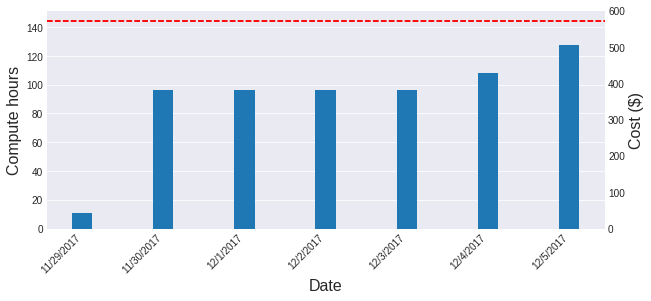

In [28]:
mask = meshB2k35r1['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r1['data'][mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * meshB2k35r1['nodes'], color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * meshB2k35r1['nodes'] *
            compute_hour_costs[meshB2k35r1['instance']],
            color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

### Re=2,000, AoA=35$^o$ (mesh B) - second restart

Finally, we restarted the simulation one last time to compute additional time units while avoiding the time-limit enforced on Azure Batch tasks.
The task was submitted on December 7, 2017, at 7:20 pm and completed by December 11, 2017, at 4:10 am.

In [29]:
meshB2k35r2 = {'ncells': 1704 * 1706 * 80,
               'nodes': 6,
               'instance': 'NC24r',
               'data': None,
               'PETSc runtime': 2.914E+05 / 3600.0  # in hours
            }

start, end = '2017-12-05', '2017-12-11'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35r2['data'] = data[mask]

Within this period, we have been charged for `Virtual Machines`, `Data Management`, `Storage`, and `Networking`, with most of the cost incurred by the use of virtual machines.

In [30]:
service_names = meshB2k35r2['data']['ServiceName'].unique()
for name in service_names:
    mask = meshB2k35r2['data']['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, meshB2k35r2['data'][mask]['Cost'].sum()))

- Data Management: $1.04
- Networking: $17.06
- Storage: $11.93
- Virtual Machines: $1971.29


#### Virtual Machines (Compute hours)

In [31]:
mask = meshB2k35r2['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2['data'][mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshB2k35r2['nodes']))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(total_hours *
              compute_hour_costs[meshB2k35r2['instance']]))
print('- Reported cost: ${:.2f}'.format(subdata['Cost'].sum()))

- Total number of compute hours: 497.80
- Number of compute hours per node: 82.97
- Expected cost for the compute hours: $1971.29
- Reported cost: $1971.29


For this task, we have been charged, for the virtual machines, for about 497.8 compute hours (or 83.0 hours per node) with the cost of $1971.3.

The duration of the task (from submission to completion) is about 81 hours, which is also the runtime reported by PETSc.

This time the number of compute hours per node being charged exceeds the task runtime.
This is explained by the fact that on December 7, 2017, I had trouble restarting the simulation.

So let's redo the cost estimation, assuming that the simulation run from 7:20 pm to midnight on December 7, 2017.

In [32]:
mask = meshB2k35r2['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2['data'][mask]

hours = subdata['Quantity'].values
# First day: assume run from 7:20 pm to midnight
hours[0] = (4.0 + 40.0 / 60) * meshB2k35r2['nodes']
total_hours = hours.sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshB2k35r2['nodes']))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(total_hours *
              compute_hour_costs[meshB2k35r2['instance']]))
costs = subdata['Cost'].values
# First day: assume run from 7:20 pm to midnight
costs[0] = ((4.0 + 40.0 / 60) *
            meshB2k35r2['nodes'] *
            compute_hour_costs[meshB2k35r2['instance']])
print('- Reported cost: ${:.2f}'.format(costs.sum()))

- Total number of compute hours: 398.13
- Number of compute hours per node: 66.36
- Expected cost for the compute hours: $1576.61
- Reported cost: $1576.61


Now, the number of compute hours per node is 66 hours, which is below the runtime of the task (or the PETSc runtime).

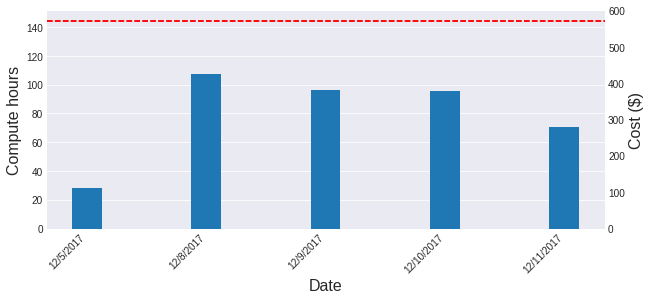

In [33]:
mask = meshB2k35r2['data']['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2['data'][mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values
# First day: assume run from 7:20 pm to midnight
hours[0] = (4.0 + 40.0 / 60) * meshB2k35r2['nodes']
costs[0] = ((4.0 + 40.0 / 60) *
            meshB2k35r2['nodes'] *
            compute_hour_costs[meshB2k35r2['instance']])

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * meshB2k35r2['nodes'], color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * meshB2k35r2['nodes'] *
            compute_hour_costs[meshB2k35r2['instance']],
            color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

### Extra simulations

Two additional tasks were submitted to Azure Batch on December 22, 2017, at 12:30 pm:

1. simulation of 100,000 time steps on a 46-million-cell mesh for the flow around a snake cylinder with a 35-degree angle of attack at Reynolds number 1,000, and
2. simulation of 100,000 time steps on a 46-million-cell mesh for the flow around a snake cylinder with a 30-degree angle of attack at Reynolds number 2,000.

Each task was submitted to its own Batch pool of 2 NC24r nodes.

The first task completed on December 27, 2017, at 6 am and PETSc reports a runtime of 113.5 hours.
The second task completed two days later, at 9:50 am with a PETSc-reported runtime of 165.4 hours.

In [34]:
meshAextra = {'ncells': 1071 * 1072 * 40,
               'nodes': 2 + 2,
               'instance': 'NC24r',
               'data': None
             }

start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshAextra['data'] = data[mask]

In [35]:
service_names = meshAextra['data']['ServiceName'].unique()
for name in service_names:
    mask = meshAextra['data']['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, meshAextra['data'][mask]['Cost'].sum()))

- Data Management: $3.51
- Networking: $12.31
- Storage: $16.94
- Virtual Machines: $1721.86


#### Virtual Machines (Compute Hours)

In [36]:
mask = meshAextra['data']['ServiceName'] == 'Virtual Machines'
subdata = meshAextra['data'][mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / meshAextra['nodes']))
print('- Calculated charge for the compute hours: ${:.2f}'
      .format(total_hours * compute_hour_costs[meshAextra['instance']]))
print('- Reported charge: ${:.2f}'.format(subdata['Cost'].sum()))

- Total number of compute hours: 434.87
- Number of compute hours per node: 108.72
- Calculated charge for the compute hours: $1722.07
- Reported charge: $1721.86


The difference between the calculated and reported charges for the compute hours is explained by the fact that the two simulations did not finish at the same time.

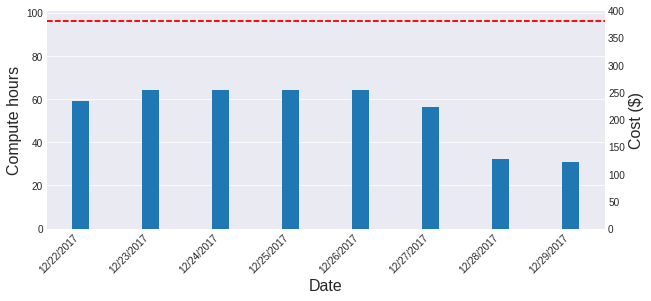

In [37]:
mask = meshAextra['data']['ServiceName'] == 'Virtual Machines'
subdata = meshAextra['data'][mask]

# Neglecting first entry because tasks failed due to HDF5 library
dates = subdata['Date'].values[1:]
hours = subdata['Quantity'].values[1:]
costs = subdata['Cost'].values[1:]

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * meshAextra['nodes'], color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * meshAextra['nodes'] *
            compute_hour_costs[meshAextra['instance']],
            color='red', linestyle='--');

#### Networking (Data Transfer)

In [38]:
mask = meshAextra['data']['ServiceName'] == 'Networking'
subdata = meshAextra['data'][mask]
print('Networking charge: ${:.2f}'.format(subdata['Cost'].sum()))

Networking charge: $12.31


Each simulation generated 125 GB of data.
The numerical solution for the run at Reynolds number 1,000 and a 35-degree angle of attack was transferred from Azure Storage to our local machine on December 22, 2017.
The numerical solution of the second run was transferred two days later.
Each transfer cost about \$6.

In [39]:
dates = ['2017-12-27', '2017-12-29']
mask = ((pandas.to_datetime(meshAextra['data']['Date']) == dates[0]) |
        (pandas.to_datetime(meshAextra['data']['Date']) == dates[1]))
subdata = meshAextra['data'][mask]
mask = ((subdata['ServiceName'] == 'Networking') &
        (subdata['ServiceResource'] == 'Data Transfer Out (GB)'))
subdata[mask]

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1644,12/27/2017,Networking,All,Zone 1,Data Transfer Out (GB),124.503279,6.038409
1674,12/29/2017,Networking,All,Zone 1,Data Transfer Out (GB),124.506586,6.038569


#### Data Management

In [40]:
mask = meshAextra['data']['ServiceName'] == 'Data Management'
subdata = meshAextra['data'][mask]
service_resources = subdata['ServiceResource'].unique()
print('Data Management costs:')
for resource in service_resources:
    mask = subdata['ServiceResource'] == resource
    cost = subdata[mask]['Cost'].sum()
    print('- {}: ${:.2f}'.format(resource, cost))

Data Management costs:
- Standard IO - Table Read Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Write Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Read Operation Units (in 10,000s): $0.00
- Standard IO - File Protocol Operation Units (in 10,000s): $0.18
- Standard IO - File Read Operation Units (in 10,000s): $0.19
- Standard IO - File Delete Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Delete Operation Units (in 10,000s): $0.00
- Standard IO - Table Scan Operation Units (in 10,000s): $0.00
- Standard IO - Table Write Operation Units (in 10,000s): $0.00
- Standard IO - Table Batch Write Operation Units (in 10,000s): $0.00
- Standard IO - File List Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob List Operation Units (in 10,000s): $0.00
- Standard IO - File Write Operation Units (in 10,000s): $3.14
